In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
df = pd.read_csv("C:\\Users\\user\\FIFA선수이적료\\FIFA_train.csv")
dataset = df.values
dataset
#df['reputation']
df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [7]:
df.loc[df["contract_until"]=="Jun 30, 2019","contract_until"] = 2019.5
df.loc[df["contract_until"]=="Dec 31, 2018","contract_until"] = 2019
df.loc[df["contract_until"]=="May 31, 2019","contract_until"] = 2019.5
df.loc[df["contract_until"]=="Jan 31, 2019","contract_until"] = 2018
df.loc[df["contract_until"]=="Jun 30, 2020","contract_until"] = 2020.5
df.loc[df["contract_until"]=="Jan 1, 2019","contract_until"] = 2018
df.loc[df["contract_until"]=="May 31, 2020","contract_until"] = 2020.5
df.loc[df["contract_until"]=="Jan 12, 2019","contract_until"] = 2018
# "2019", 2019를 하나로 묶어주기 위한 타입 변화
df["contract_until"] = df["contract_until"].astype(float)

In [8]:
df['contract_until']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   float64
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 837.5+ KB


# 데이터 정보

범주형 값:이름, 국적, 포지션, 주발

웟-핫 인코딩이 필요한 부분:포지션, 주발

정수형 값:고유번호, 나이, 계약기간, 인지도, 발전가능성, 개인기, 선수 능력치

In [9]:
df.sort_values(by='value',ascending = False) #내림차순

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021.0,ST,left,5.0,94,94,4.0,110500000.0
2,7,L. Suárez,31,south america,2021.0,ST,right,5.0,91,91,3.0,80000000.0
17,30,Isco,26,europe,2022.0,ST,right,3.0,88,91,4.0,73500000.0
1,3,De Gea,27,europe,2020.0,GK,right,4.0,91,93,1.0,72000000.0
14,26,M. Salah,26,africa,2023.0,MF,left,3.0,88,89,4.0,69500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8737,16497,F. Nicastro,36,europe,2021.0,GK,right,1.0,53,53,1.0,10000.0
8534,16043,Y. Nishibe,37,asia,2021.0,GK,right,1.0,55,55,1.0,10000.0
8274,15465,K. Kitamoto,36,asia,2021.0,DF,right,1.0,57,57,2.0,10000.0
8158,15182,B. Lekström,37,europe,2018.0,GK,right,1.0,58,58,1.0,10000.0


In [10]:
data = df.iloc[:,4]-2017
data= pd.DataFrame(data)
df.iloc[:,4]= data
df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,4.0,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,3.0,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,4.0,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,3.0,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,4.0,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2.0,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,3.0,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,4.0,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,4.0,GK,right,1.0,47,65,1.0,50000.0


In [11]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
dataset = df.values
cnte = df.iloc[:,3]
e = LabelEncoder()
e.fit(cnte)
Y = e.transform(cnte)


po = df.iloc[:,5]
e.fit(po)
Y1= e.transform(po)

fo = df.iloc[:,6]
e.fit(fo)
Y2= e.transform(fo)



Y= pd.DataFrame(Y)
Y1= pd.DataFrame(Y1)
Y2= pd.DataFrame(Y2)
df.iloc[:,3]= Y
df.iloc[:,5]= Y1
df.iloc[:,6]= Y2
df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,4,4.0,3,0,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,2,3.0,1,1,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,4,4.0,3,1,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,2,3.0,0,1,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,2,4.0,1,1,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,0,2.0,2,1,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,2,3.0,0,1,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,4,4.0,0,1,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,2,4.0,1,1,1.0,47,65,1.0,50000.0


# 상관관계 살펴보기

잠재적 능력치- 선수 능력치:0.67


### 잠재적 능력치, 능력치, 인지도, 개인기는 이적료와 관계가 있다.


버릴 속성:아이디, 나이

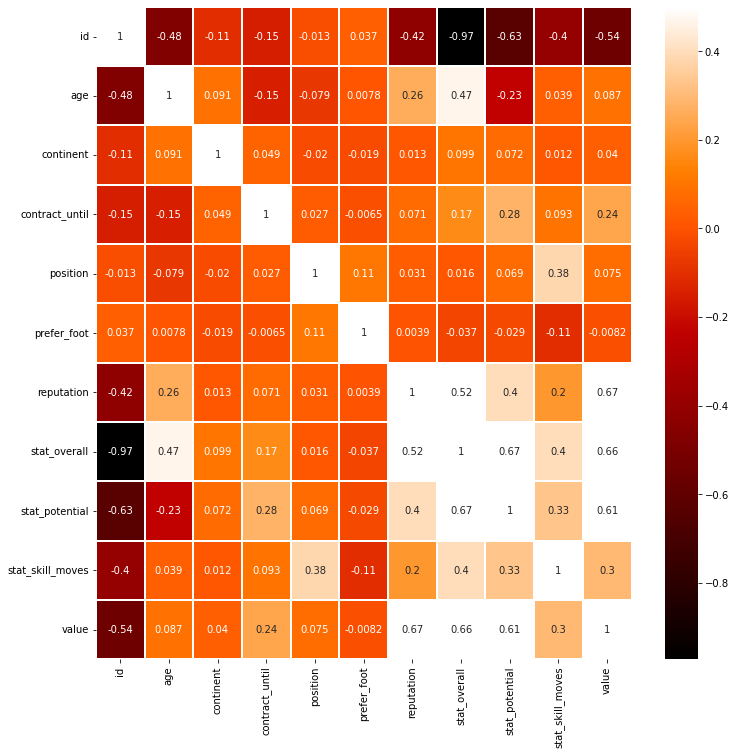

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (12,12))

sns.heatmap(df.corr(), linewidths = 0.1, vmax = 0.5, cmap = plt.cm.gist_heat, linecolor = 'white', annot = True)


plt.show()



{'whiskers': [<matplotlib.lines.Line2D at 0x19d924a2640>,
 'caps': [<matplotlib.lines.Line2D at 0x19d924a2be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19d924a2370>],
 'medians': [<matplotlib.lines.Line2D at 0x19d924901c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19d92490490>],
 'means': []}

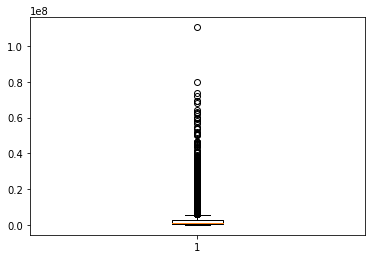

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
dataset = df.values

Y= dataset[:,11].astype(float)
plt.boxplot(Y)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
dataset = df.values

df["log_value"] = np.log(df["value"])



Y = dataset[:,12].astype(float)
plt.boxplot(Y)

IndexError: index 12 is out of bounds for axis 1 with size 12

# 나이와 이적료의 상관

그래프에서 나이와 이적료는 관련이 없음을 증명하였다. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# seaborn as sns
import seaborn as sns
f , ax = plt.subplots()
f.set_size_inches(11,5)
# 나이별 평균 이적료
group_age_value = df.groupby("age")["value"].mean()
group_age_value = group_age_value.reset_index()
# 나이별 평균 이적료 막대 그래프
sns.barplot(x="age", y="value",data=group_age_value)
# 설정
ax.set(title='value_for_age',xlabel="age",ylabel="value")

# 선수 나이와 능력치 상관 관계

나이와 이적료의 상관성은 0.087로 매우 낮다

그러나 나이와 선수 능력치의 상관성은 0.47로 관계가 높다.

선수 능력치와 이적료 상관성은 0.66으로 관련이 있으므로
나이와 이적료또한 상관성이 있을수 있다는 결론에 도달한다.
 

In [ ]:
group_age_value = df.groupby("age")["stat_overall"].mean()
group_age_value = group_age_value.reset_index()
# 나이별 평균 이적료 막대 그래프
sns.barplot(x="age", y="stat_overall",data=group_age_value)
# 설정
ax.set(title='statoverall_for_age',xlabel="age",ylabel="stat_overall")

In [ ]:
df['age'].value_counts()

# 인지도와 이적료의 상관

인지도가 높을 수록 평균적으로 선수의 이적료가 높다는 것을 알수 있다. 따라서 인지도는 이적료에 영향을 준다는 것이 증명되었다. 

NameError: name 'ax' is not defined

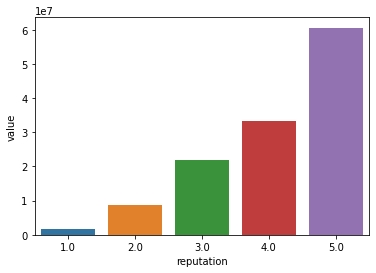

In [15]:
group_age_value = df.groupby("reputation")["value"].mean()  
group_age_value = group_age_value.reset_index()
# 나이별 평균 이적료 막대 그래프
sns.barplot(x="reputation", y="value",data=group_age_value)
# 설정
ax.set(title='value_for_reputation',xlabel="reputation",ylabel="value")

# 잠재적 능력치와 이적료의 상관

[Text(0.5, 1.0, 'value_for_potential'),
 Text(0.5, 0, 'stat_potential'),
 Text(0, 0.5, 'value')]

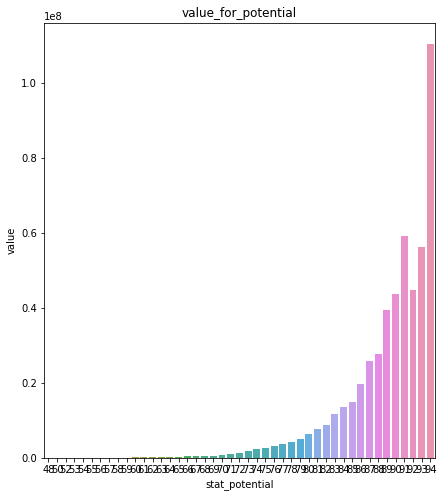

In [16]:
f , ax = plt.subplots()
f.set_size_inches(7,8)


group_age_value = df.groupby("stat_potential")["value"].mean()  
group_age_value = group_age_value.reset_index()
# 나이별 평균 이적료 막대 그래프
sns.barplot(x="stat_potential", y="value",data=group_age_value)
# 설정
ax.set(title='value_for_potential',xlabel="stat_potential",ylabel="value")

[Text(0.5, 1.0, 'value_for_potential'),
 Text(0.5, 0, 'stat_potential'),
 Text(0, 0.5, 'log_value')]

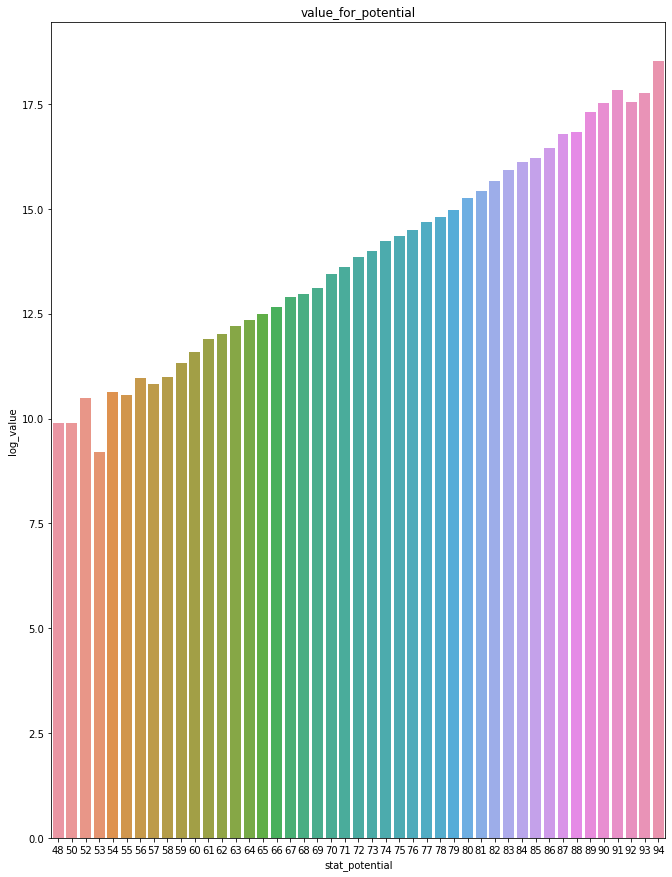

In [17]:
f , ax = plt.subplots()
f.set_size_inches(11,15)

dataset = df.values
df["log_value"] = np.log(df["value"])



group_age_value = df.groupby("stat_potential")["log_value"].mean()  
group_age_value = group_age_value.reset_index()
# 나이별 평균 이적료 막대 그래프
sns.barplot(x="stat_potential", y="log_value",data=group_age_value)
# 설정
ax.set(title='value_for_potential',xlabel="stat_potential",ylabel="log_value")

# 개인 능력치와 이적료 상관

[Text(0.5, 1.0, 'value_for_stat_skill_moves'),
 Text(0.5, 0, 'stat_skill_moves'),
 Text(0, 0.5, 'value')]

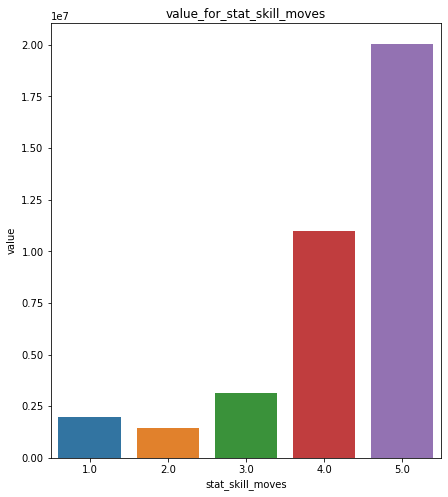

In [18]:
f , ax = plt.subplots()
f.set_size_inches(7,8)


group_age_value = df.groupby("stat_skill_moves")["value"].mean()  
group_age_value = group_age_value.reset_index()
# 나이별 평균 이적료 막대 그래프
sns.barplot(x="stat_skill_moves", y="value",data=group_age_value)
# 설정
ax.set(title='value_for_stat_skill_moves',xlabel="stat_skill_moves",ylabel="value")


# 선수계약기간과 이적료 상관

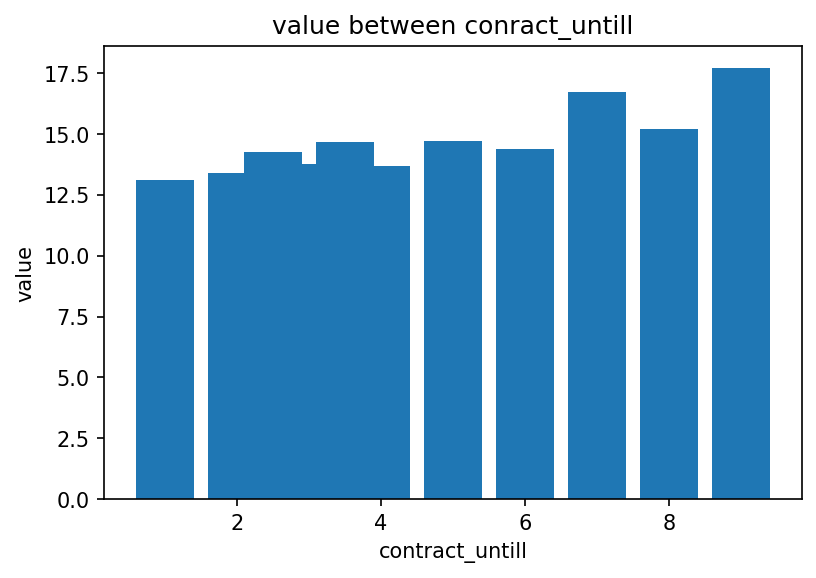

In [19]:
x = df.groupby('contract_until').mean()['log_value'].index
y = df.groupby('contract_until').mean()['log_value'].values

plt.figure(dpi=150)

plt.title('value between conract_untill')
plt.xlabel('contract_untill')
plt.ylabel('value')

plt.bar(x, y)
plt.show() 

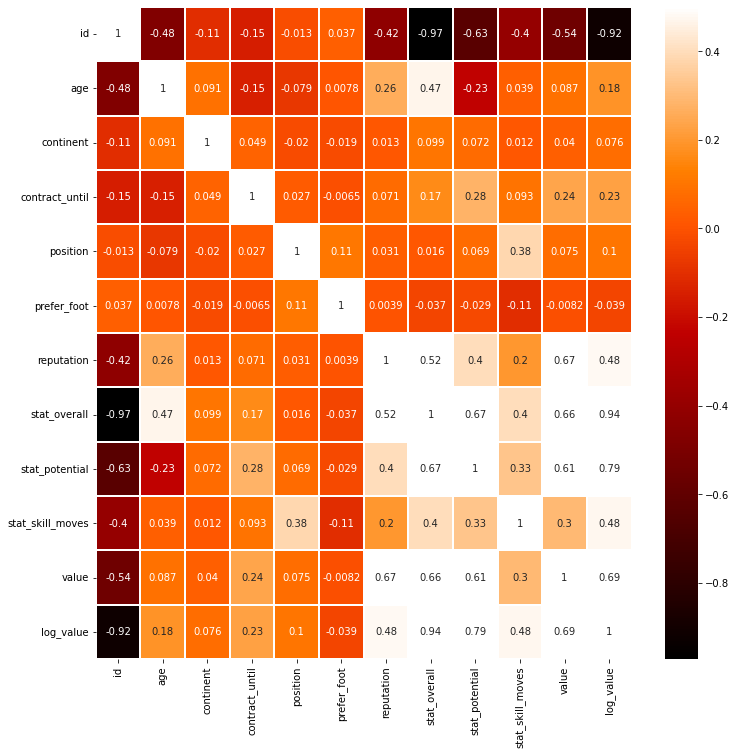

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (12,12))

sns.heatmap(df.corr(), linewidths = 0.1, vmax = 0.5, cmap = plt.cm.gist_heat, linecolor = 'white', annot = True)


plt.show()

# 결론
버릴 속성: id, continent, position은 빼지는 않지만 정확도가 낮을시 뺄수도 잇다.prefer_foot.

학습을 log_value로 해주고 테스트도 log_value로 해주고 

마지막에 np.e(df["log_value"])로 log_value를 value로 바꿔준다. 

evaluate할때 실째 몸값과 예측 몸값을 value로 출력해준다.

In [21]:
df = df.drop(columns = ['name','id', 'continent', 'prefer_foot',])
df

,age,contract_until,position,reputation,stat_overall,stat_potential,stat_skill_moves,value,log_value
0,31,4.0,3,5.0,94,94,4.0,110500000.0,18.520526
1,27,3.0,1,4.0,91,93,1.0,72000000.0,18.092177
2,31,4.0,3,5.0,91,91,3.0,80000000.0,18.197537
3,32,3.0,0,4.0,91,91,3.0,51000000.0,17.747336
4,25,4.0,1,3.0,90,93,1.0,68000000.0,18.035018
...,...,...,...,...,...,...,...,...,...
8927,18,2.0,2,1.0,48,63,3.0,60000.0,11.002100
8928,19,3.0,0,1.0,47,59,2.0,40000.0,10.596635
8929,18,4.0,0,1.0,47,64,2.0,50000.0,10.819778
8930,18,4.0,1,1.0,47,65,1.0,50000.0,10.819778


In [22]:
data_test = pd.read_csv("C:\\Users\\user\\FIFA선수이적료\\FIFA_test.csv")
data_test

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0
3824,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0
3825,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0
3826,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0


In [23]:
data_test = data_test.drop(columns = ['name','id', 'continent', 'prefer_foot'])
data_test

,age,contract_until,position,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,2022,ST,5.0,94,94,5.0
1,26,2022,ST,5.0,92,93,5.0
2,27,2023,MF,4.0,91,92,4.0
3,27,2020,ST,4.0,91,91,4.0
4,32,2020,MF,4.0,91,91,4.0
...,...,...,...,...,...,...,...
3823,20,2021,MF,1.0,48,63,2.0
3824,18,2018,GK,1.0,48,65,1.0
3825,18,2021,MF,1.0,48,65,2.0
3826,18,2020,ST,1.0,47,61,2.0


In [24]:
print(data_test['contract_until'].value_counts())

2021            985
2019            943
2020            882
2022            338
2023            251
Jun 30, 2019    209
2018            155
Dec 31, 2018     34
May 31, 2019     14
2025              4
Jun 30, 2020      4
2024              2
Jan 31, 2019      2
Jan 1, 2019       1
May 31, 2020      1
Jun 1, 2019       1
Dec 31, 2019      1
2026              1
Name: contract_until, dtype: int64


In [25]:
data_test.loc[data_test["contract_until"]=="Jun 30, 2019","contract_until"] = 2019.5
data_test.loc[data_test["contract_until"]=="Dec 31, 2018","contract_until"] = 2019
data_test.loc[data_test["contract_until"]=="May 31, 2019","contract_until"] = 2019.5
data_test.loc[data_test["contract_until"]=="Jan 31, 2019","contract_until"] = 2018
data_test.loc[data_test["contract_until"]=="Jun 30, 2020","contract_until"] = 2020.5
data_test.loc[data_test["contract_until"]=="Jan 1, 2019","contract_until"] = 2018
data_test.loc[data_test["contract_until"]=="May 31, 2020","contract_until"] = 2020.5
data_test.loc[data_test["contract_until"]=="Jun 1, 2019","contract_until"] = 2019.5
data_test.loc[data_test["contract_until"]=="Dec 31, 2019","contract_until"] = 2020

data_test["contract_until"] = data_test["contract_until"].astype(float)

In [26]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3828 non-null   int64  
 1   contract_until    3828 non-null   float64
 2   position          3828 non-null   object 
 3   reputation        3828 non-null   float64
 4   stat_overall      3828 non-null   int64  
 5   stat_potential    3828 non-null   int64  
 6   stat_skill_moves  3828 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 209.5+ KB


In [27]:
data_test

,age,contract_until,position,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,2022.0,ST,5.0,94,94,5.0
1,26,2022.0,ST,5.0,92,93,5.0
2,27,2023.0,MF,4.0,91,92,4.0
3,27,2020.0,ST,4.0,91,91,4.0
4,32,2020.0,MF,4.0,91,91,4.0
...,...,...,...,...,...,...,...
3823,20,2021.0,MF,1.0,48,63,2.0
3824,18,2018.0,GK,1.0,48,65,1.0
3825,18,2021.0,MF,1.0,48,65,2.0
3826,18,2020.0,ST,1.0,47,61,2.0


In [28]:
data_t = data_test.iloc[:,1]-2017
data_t = pd.DataFrame(data_t)
data_test.iloc[:,1]= data_t
data_test

,age,contract_until,position,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,5.0,ST,5.0,94,94,5.0
1,26,5.0,ST,5.0,92,93,5.0
2,27,6.0,MF,4.0,91,92,4.0
3,27,3.0,ST,4.0,91,91,4.0
4,32,3.0,MF,4.0,91,91,4.0
...,...,...,...,...,...,...,...
3823,20,4.0,MF,1.0,48,63,2.0
3824,18,1.0,GK,1.0,48,65,1.0
3825,18,4.0,MF,1.0,48,65,2.0
3826,18,3.0,ST,1.0,47,61,2.0


In [29]:
dataset_test = data_test.values
cnte = data_test.iloc[:,2]
e = LabelEncoder()
e.fit(cnte)
Y = e.transform(cnte)
Y= pd.DataFrame(Y)
data_test.iloc[:,2]= Y
data_test

,age,contract_until,position,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,5.0,3,5.0,94,94,5.0
1,26,5.0,3,5.0,92,93,5.0
2,27,6.0,2,4.0,91,92,4.0
3,27,3.0,3,4.0,91,91,4.0
4,32,3.0,2,4.0,91,91,4.0
...,...,...,...,...,...,...,...
3823,20,4.0,2,1.0,48,63,2.0
3824,18,1.0,1,1.0,48,65,1.0
3825,18,4.0,2,1.0,48,65,2.0
3826,18,3.0,3,1.0,47,61,2.0


In [42]:
from sklearn.ensemble import RandomForestRegressor
train_x = df.drop(columns = ['log_value','value'])
train_y = df['value']
model = RandomForestRegressor()
model.fit(train_x, train_y)

RandomForestRegressor()

In [59]:
df

,age,contract_until,position,reputation,stat_overall,stat_potential,stat_skill_moves,value,log_value
0,31,4.0,3,5.0,94,94,4.0,110500000.0,18.520526
1,27,3.0,1,4.0,91,93,1.0,72000000.0,18.092177
2,31,4.0,3,5.0,91,91,3.0,80000000.0,18.197537
3,32,3.0,0,4.0,91,91,3.0,51000000.0,17.747336
4,25,4.0,1,3.0,90,93,1.0,68000000.0,18.035018
...,...,...,...,...,...,...,...,...,...
8927,18,2.0,2,1.0,48,63,3.0,60000.0,11.002100
8928,19,3.0,0,1.0,47,59,2.0,40000.0,10.596635
8929,18,4.0,0,1.0,47,64,2.0,50000.0,10.819778
8930,18,4.0,1,1.0,47,65,1.0,50000.0,10.819778


In [46]:
submission = pd.read_csv('C:\\Users\\user\\FIFA선수이적료\\submission.csv',encoding='utf-8')
pred = model.predict(data_test)
submission['value'] = pred
submission.head()


,id,value
0,1,76275000.0
1,2,76855000.0
2,4,68125000.0
3,5,71660000.0
4,6,64185000.0


In [61]:
from sklearn.model_selection import train_test_split
df = df.values
X_train, X_test, y_train, y_test = train_test_split(df[:,:8],df[:,8], test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7145, 8), (1787, 8), (7145,), (1787,))

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true-y_pred) / y_true) * 100

def norm_mean_absolute_error(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)/np.mean(np.abs(y_true))

def regression_scores(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    nmae = norm_mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'mse':np.round(mse,3), 'rmse':np.round(rmse,3), 'mae':np.round(mae,3), 'nmae':np.round(nmae,3), 'mape':np.round(mape,3), 'r2':np.round(r2,3) }

In [66]:
from sklearn.ensemble import RandomForestRegressor
y_pred = model.predict(X_test)
score = regression_scores(y_test, y_pred)
df_score.loc['model'] = score
df_score.style.background_gradient(cmap='Blues_r')

C:\Users\user\anaconda3\envs\tf_2_5\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 8 features, but RandomForestRegressor is expecting 7 features as input.